In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [7]:
df= pd.read_csv(r'C:\Users\Giuseppe\Desktop\Lab\Analisi statistica dei dati speriemntali\Progetto\Pan_di_Stelle.csv')

In [8]:
df

,Fase,V1,V2,w1,w2
0,0.1516,-68.22,216.48,0.5,0.5
1,0.1826,-67.24,237.55,1.0,1.0
2,0.7261,116.90,-200.04,1.0,1.0
3,0.7574,116.91,-208.79,1.0,1.0
4,0.0984,-51.23,165.41,1.0,1.0
5,0.1299,-57.31,197.76,1.0,1.0
6,0.1632,-64.92,235.53,1.0,1.0
7,0.1951,-71.21,243.67,1.0,1.0
8,0.2289,-76.24,261.48,1.0,1.0
9,0.3110,-59.35,252.80,1.0,1.0


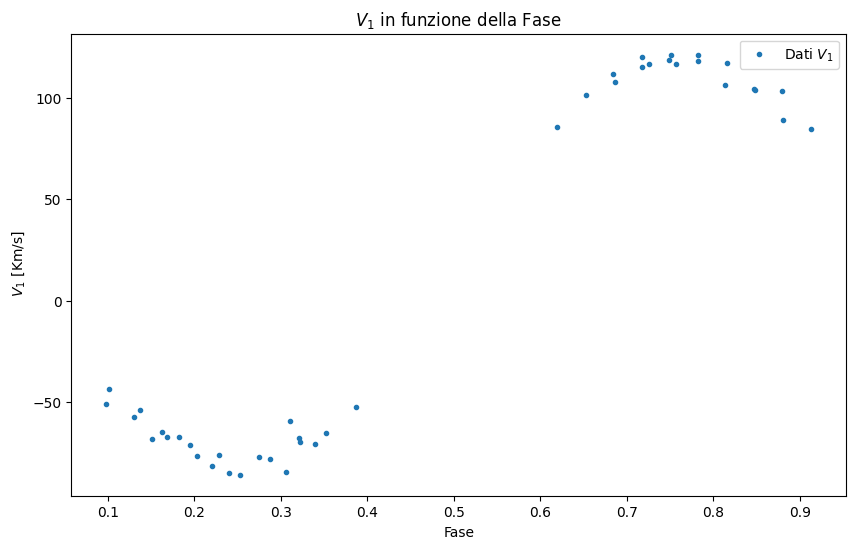

In [141]:
Fase=df['Fase'].values
V1=df['V1'].values
V2=df['V2'].values
plt.figure(figsize=(10 ,6))
plt.errorbar(Fase , V1, ls='none', marker=".", label=('Dati $V_1$'))
plt.title('$V_1$ in funzione della Fase')
plt.xlabel('Fase')
plt.legend()
plt.ylabel(' $V_1$ [Km/s]')
plt.show()

In [59]:
def model_k(x, *par):
    return par[0] * (np.cos(par[1] * x + par[2]) + par[3] * np.cos(par[2]))
errors=np.ones_like(V1)

In [65]:
#least_squares_mode = LeastSquares(Fase, V1, errors, FRANCO)
#m = Minuit(least_squares_mode, *(0.5, 16000), name=("$kgukg$", "$f_0$"))
#m.limits=((0,1000000), (0, 1000000))


In [66]:
#m.migrad()

In [144]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Definisci il modello con quattro parametri
def model_k(Fase, k, w, e, Z):
    return k * (np.cos(Z * Fase + w) + e * np.cos(w))

Fase = df['Fase']
V1 = df['V1']




least_squares_mode = LeastSquares(Fase, V1, errors, model_k)



parameter_names = ["k", "w", "e", "Z"]


parameter_limits = [(0, 100000), (0, 1000000), (0, 10), (0, 10)]


m = Minuit(least_squares_mode, k=initial_guesses[0], w=initial_guesses[1], e=initial_guesses[2], Z=initial_guesses[3])



m.limits = parameter_limits



m.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1090 (χ²/ndof = 28.7)      │              Nfcn = 815              │
│ EDM = 0.0172 (Goal: 0.0002)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k    │  101.12   │   0.10    │            │            │    0    │ 100000  │       │
│ 1 │ w    │15.99854153e3│0.00000012e3│            │            │    0    │  1e+06  │       │
│ 2 │ e    │   9.93    │   0.04    │            │            │    0    │   10    │       │
│ 3 │ Z    │   6.222   │   0.004   │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │         k         w         e         Z │
├───┼─────────────────────────────────────────┤
│ k │    0.0108 -2.101e-6    0.0001  0.031e-3 │
│ w │ -2.101e-6  1.31e-08 -3.078e-6 -0.069e-6 │
│ e │    0.0001 -3.078e-6   0.00179  0.022e-3 │
│ Z │  0.031e-3 -0.069e-6  0.022e-3  1.26e-05 │
└───┴─────────────────────────────────────────┘

In [143]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Definisci il modello con quattro parametri
def model_k(Fase, k, w, e, Z):
    return k * (np.cos(Z * Fase + w) + e * np.cos(w))


Fase = df['Fase']
V2 = df['V2']




least_squares_mode = LeastSquares(Fase, V2, errors, model_k)


parameter_names = ["k", "w", "e", "Z"]


parameter_limits = [(0, 100000), (0, 1000000), (0, 10), (0, 10)]


m1 = Minuit(least_squares_mode, k=initial_guesses[0], w=initial_guesses[1], e=initial_guesses[2], Z=initial_guesses[3])




m1.limits = parameter_limits




m1.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.715e+04 (χ²/ndof = 451.4)│              Nfcn = 695              │
│ EDM = 2.15e+03 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k    │  247.39   │   0.22    │            │            │    0    │ 100000  │       │
│ 1 │ w    │15.99543891e3│0.00000024e3│            │            │    0    │  1e+06  │       │
│ 2 │ e    │   2.98    │   0.05    │            │            │    0    │   10    │       │
│ 3 │ Z    │  6.5138   │  0.0019   │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │         k         w         e         Z │
├───┼─────────────────────────────────────────┤
│ k │    0.0503 -11.46e-6    0.0023    206e-6 │
│ w │ -11.46e-6  5.59e-08  -0.61e-6  -0.20e-6 │
│ e │    0.0023  -0.61e-6   0.00206     21e-6 │
│ Z │    206e-6  -0.20e-6     21e-6  3.77e-06 │
└───┴─────────────────────────────────────────┘